In [1]:
import pandas as pd
import numpy as np
import sklearn
import lightgbm
from mypython import MLmodel, Treemodel, Linearmodel
from mypython import PurgedGroupTimeSeriesSplit as tss

import time
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

x = np.load('/home/qianshuofu/factor_qianshuofu/Data/data_feature.npy')
y = np.load('/home/qianshuofu/factor_qianshuofu/Data/data_label.npy')
groups = np.load('/home/qianshuofu/factor_qianshuofu/Data/data_index.npy',allow_pickle=True)[:,1]

/home/qianshuofu/anaconda3/envs/rapids-22.12/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


n_groups:964,n_splits:5
group_test_starts:range(424, 964, 108)
group_train_starts:range(0, 540, 108)


<Axes: title={'center': 'PurgedGroupTimeSeriesSplit'}, xlabel='Sample index', ylabel='CV iteration'>

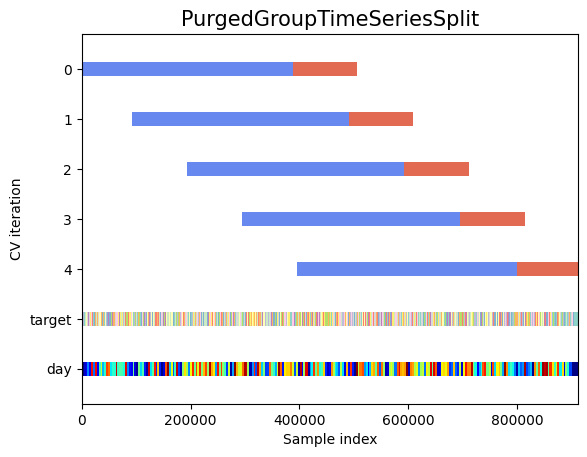

In [2]:
fig, ax = plt.subplots()
cv = tss.PurgedGroupTimeSeriesSplit(n_splits=5)
tss.plot_cv_indices(cv,x,y,groups,ax,split_method=False)

In [3]:
cv = tss.PurgedGroupTimeSeriesSplit(n_splits=5).split_2(x,y,groups)

train_index = []
test_index = []
model_list = []
y_pred_list = []
mse_list = []

for ii, (tr,te) in enumerate(cv):
    dataset = lightgbm.Dataset(x[tr],y[tr])
    model = lightgbm.train(params={},train_set=dataset)
    y_pred = model.predict(x[te])
    mse = sklearn.metrics.mean_squared_error(y_pred,y[te])

    print(mse)

    train_index.append(tr)
    test_index.append(te)
    model_list.append(model)
    y_pred_list.append(y_pred)
    mse_list.append(mse)

n_groups:964,n_splits:5
group_test_starts:range(424, 964, 108)
group_train_starts:range(0, 540, 108)
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 1.266575 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 256271
[LightGBM] [Info] Number of data points in the train set: 396280, number of used features: 1005
[LightGBM] [Info] Start training from score -0.003181
0.9973884940220303
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 1.400936 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 256273
[LightGBM] [Info] Number of data points in the train set: 398523, number of used features: 1005
[LightGBM] [Info] Start training from score -0.004053
1.018641456739229
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 1.484432 seconds.
You can set `force_col_wise=true` to remove the overh

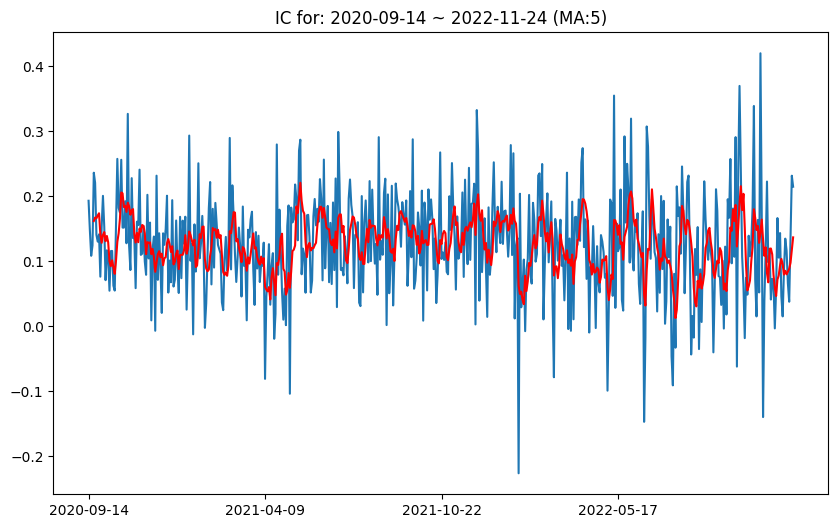

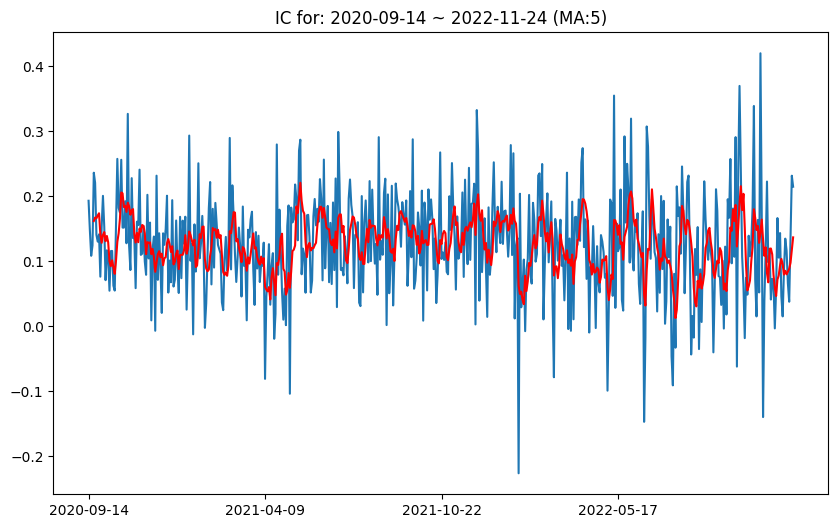

In [5]:
tss.plot_ic(y,test_index,y_pred_list,groups,ma=5,continuous=True)

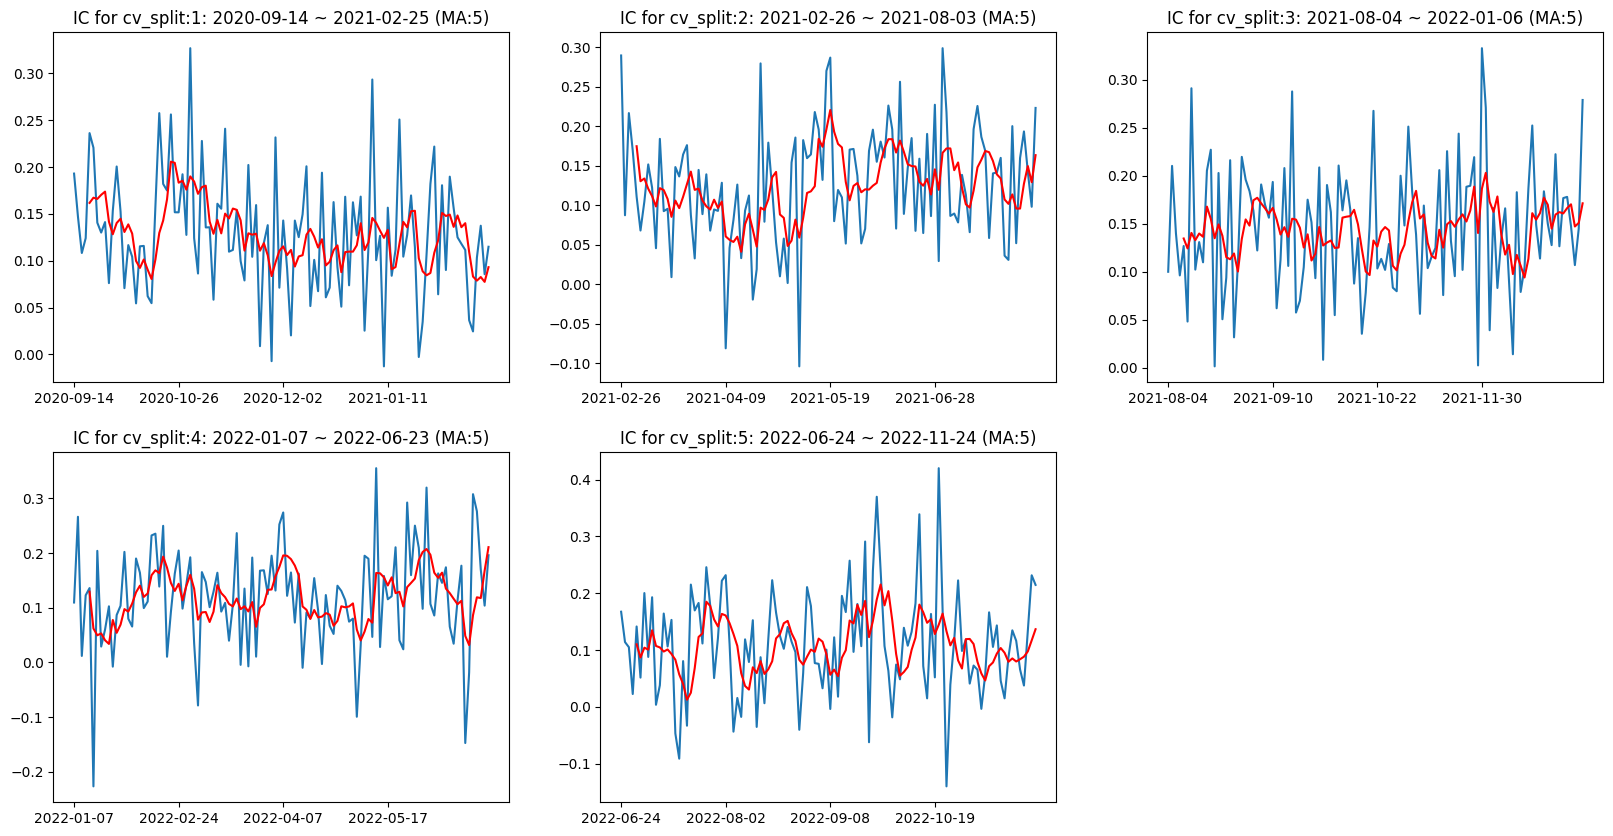

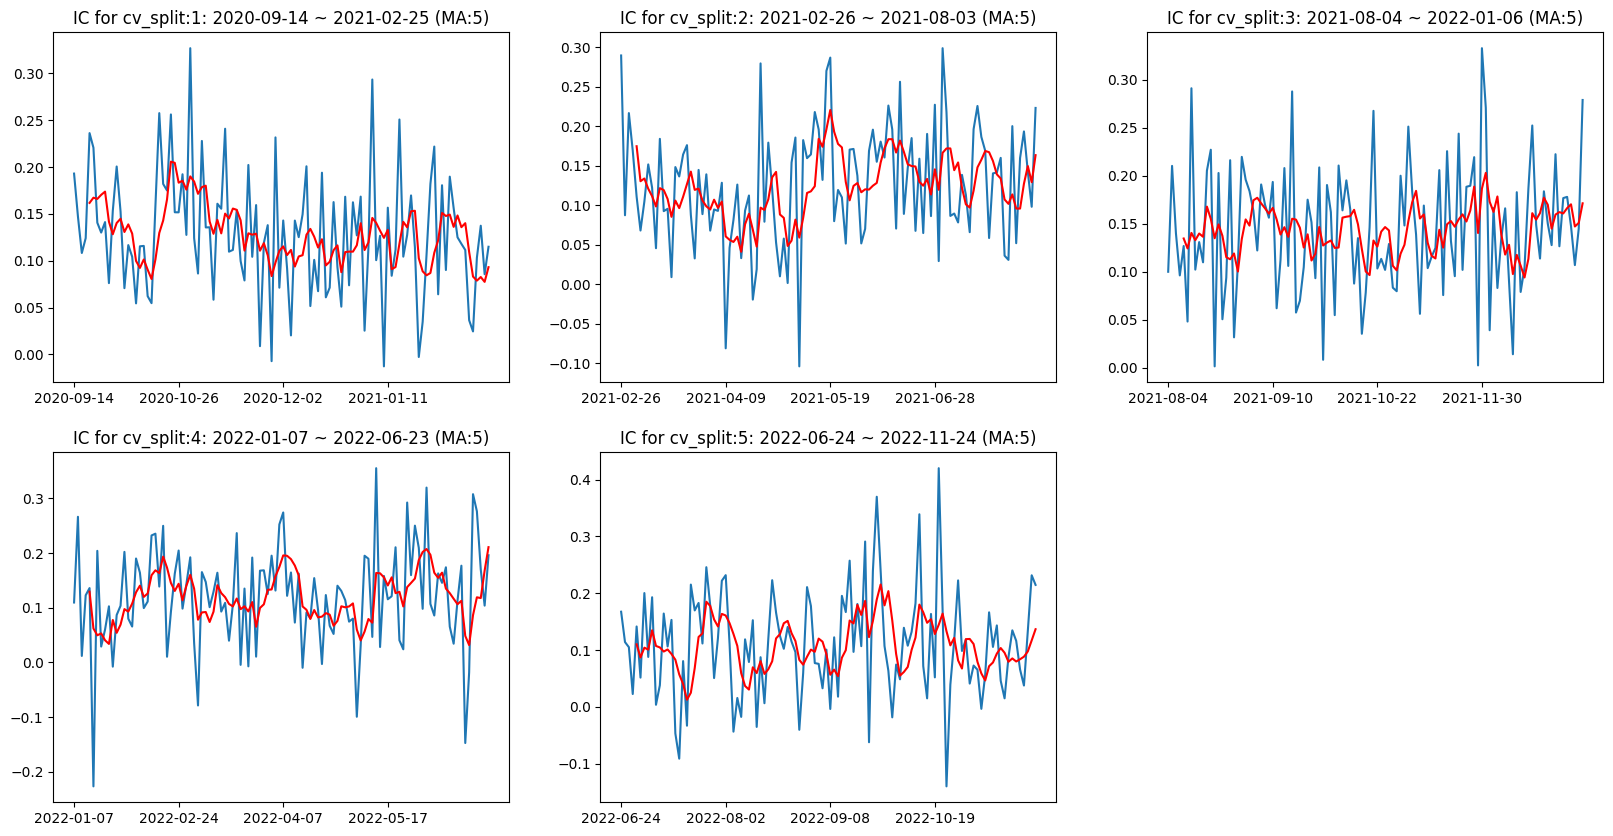

In [6]:
tss.plot_ic(y,test_index,y_pred_list,groups,ma=5,continuous=False)